pip install numpy  
pip install pandas  
pip install openpyxl  
pip install tqdm
pip install ffmpeg  
pip install pydub  
conda install -c conda-forge librosa  
pip install -U praat-parselmouth

In [1]:
import pydub
import pandas as pd
from tqdm import tqdm
import os

pydub.AudioSegment.converter = r"C:/Users/Kinza/anaconda3/envs/pie/Library/bin/ffmpeg.exe" #CHANGE THIS

# Data loading

In [2]:
def get_end_from_start(df_mail):
    end             = df_mail.iloc[1:,:]['start'].copy()
    end[len(end)+1] = -1
    df_mail['end']  = end.values
    return df_mail

def get_start_end_from_file(file):
    #Get start and end times
    df = pd.read_excel(file,1)
    df = df.rename(columns={'time':'start'}) 
    df['start'] = df['start']*1000 #in ms

    df = df.groupby('email').apply(get_end_from_start)
    return df

def load_audios(video_folder,startend_file) :
    '''Loads the audios from each interview question.
    Arguments:
        video_folder : str. The name of the folder containing mp4 videos.
        startend_file : str. The name of the file containing the video informations. 
            Must contain columns 'mail' and 'time'.
    Returns a list of audios
    '''
    filenames = tqdm(os.listdir(video_folder))
    df_startend = get_start_end_from_file(startend_file)
    audios = list(map(lambda f : load_audio(video_folder,df_startend,f), filenames))
    return [item for sublist in audios for item in sublist]


In [4]:
from audio_feats_extract import load_audio

video_folder = 'videos/'
df_name = 'notes_entretiens_all.xlsx'

audios = load_audios(video_folder,df_name)

  0%|          | 0/25 [00:00<?, ?it/s]

alexis.przybylak@student.isae-supaero.fr.mp4


  4%|▍         | 1/25 [01:20<32:03, 80.14s/it]

anna.gounot@student.isae-supaero.fr.mp4


  8%|▊         | 2/25 [02:46<32:11, 83.96s/it]

basile.rochut@student.isae-supaero.fr.mp4


 12%|█▏        | 3/25 [03:35<24:56, 68.02s/it]

boudabousarah@gmail.com.mp4


 16%|█▌        | 4/25 [03:46<15:56, 45.56s/it]

clemi.petin@hotmail.fr.mp4


 20%|██        | 5/25 [05:01<18:43, 56.17s/it]

coop.pierre@gmail.com.mp4


 24%|██▍       | 6/25 [05:49<16:48, 53.09s/it]

Guillaume.de-battisti@student.isae-supaero.fr.mp4


 28%|██▊       | 7/25 [06:54<17:05, 56.99s/it]

heronheloise@outlook.fr.mp4


 32%|███▏      | 8/25 [07:07<12:12, 43.07s/it]

Hugo.SANCHEZ@student.isae-supaero.fr.mp4


 36%|███▌      | 9/25 [08:06<12:47, 47.98s/it]

khadija.kasmi@me.com.mp4


 40%|████      | 10/25 [09:10<13:15, 53.01s/it]

laura.hyest@student.isae-supaero.fr.mp4


 44%|████▍     | 11/25 [10:10<12:53, 55.28s/it]

laurine.meunier18@gmail.com.mp4


 48%|████▊     | 12/25 [10:54<11:12, 51.75s/it]

maloserra.p@gmail.com.mp4


 52%|█████▏    | 13/25 [11:42<10:07, 50.65s/it]

marine.de-la-fontaine-de-fontenay-le-lievre-de@student.isae-supaero.fr.mp4


 56%|█████▌    | 14/25 [12:39<09:36, 52.43s/it]

matilde.accorsi@univ-tlse3.fr.mp4


 60%|██████    | 15/25 [13:20<08:11, 49.16s/it]

melekbenmosbah@gmail.com.mp4


 64%|██████▍   | 16/25 [14:08<07:18, 48.68s/it]

merhabencyrine@gmail.com.mp4


 68%|██████▊   | 17/25 [15:24<07:35, 56.99s/it]

mouillelucie@orange.fr.mp4


 72%|███████▏  | 18/25 [17:20<08:42, 74.69s/it]

Pierre-antoine.DRICOT@student.isae-supaero.fr.mp4


 76%|███████▌  | 19/25 [18:18<06:58, 69.79s/it]

pro.kaiskasmi@gmail.com.mp4


 80%|████████  | 20/25 [18:49<04:50, 58.11s/it]

Quentin.PRIETO@student.isae-supaero.fr.mp4


 84%|████████▍ | 21/25 [20:00<04:07, 61.82s/it]

sophie.bonte@student.isae-supaero.fr.mp4


 88%|████████▊ | 22/25 [21:27<03:27, 69.33s/it]

thomas.sentucq@student.isae-supaero.fr.mp4


 92%|█████████▏| 23/25 [22:16<02:06, 63.29s/it]

thomas.sentucq@student.isae-supaero.fr1.mp4


 96%|█████████▌| 24/25 [23:05<00:59, 59.00s/it]

Titouan.DELLIS@student.isae-supaero.fr.mp4


100%|██████████| 25/25 [23:50<00:00, 57.20s/it]


# Load features

In [5]:
from models_utils import get_features, get_scores, merge_scores_feats
feats = get_features(audios)

In [6]:
feats.to_csv('feats.csv')

# Visualizations

In [25]:
feats

,voicedcount,npause,originaldur,intensity_duration,speakingrate,articulationrate,asd,nb_pauses,mean_pauses,max_pauses,...,spec_bw_std,spec_cent_max,spec_cent_mean,spec_cent_min,spec_cent_std,zcr_max,zcr_mean,zcr_min,zcr_std,time
email,,,,,,,,,,,,,,,,,,,,,
alexis.przybylak@student.isae-supaero.fr,452.0,26.0,80.026979,80.026979,5.648095,7.339569,0.136248,0.024096,0.030120,0.036145,...,733.845672,5908.335344,1741.524060,312.979982,1346.880820,0.260254,0.054379,0.007812,0.057165,0.0
alexis.przybylak@student.isae-supaero.fr,390.0,21.0,67.930979,67.930979,5.741121,7.315426,0.136697,0.028571,0.028571,0.028571,...,734.467613,5859.489972,1655.875369,298.937322,1336.797202,0.250488,0.049482,0.005371,0.054778,83.0
alexis.przybylak@student.isae-supaero.fr,530.0,52.0,108.778979,108.778979,4.872265,7.253120,0.137872,0.018182,0.018182,0.018182,...,861.209347,6032.075523,1636.173472,306.607216,1318.330323,0.260254,0.046235,0.005371,0.053581,153.0
anna.gounot@student.isae-supaero.fr,520.0,24.0,90.034979,90.034979,5.775533,6.922258,0.144462,0.000000,0.000000,0.000000,...,1345.376943,12117.763244,2982.579947,405.258395,2745.809711,0.529297,0.076166,0.008789,0.103656,0.0
anna.gounot@student.isae-supaero.fr,497.0,24.0,87.970979,87.970979,5.649590,6.641412,0.150570,0.022222,0.033333,0.033333,...,1358.221192,12893.907172,2916.640165,413.233074,2651.391068,0.533691,0.073324,0.007324,0.099801,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
thomas.sentucq@student.isae-supaero.fr1,260.0,21.0,57.034979,57.034979,4.558606,6.049888,0.165292,0.016949,0.050847,0.050847,...,1309.286308,10452.317813,2467.076097,456.350651,2139.414881,0.339844,0.066171,0.006348,0.073827,88.0
thomas.sentucq@student.isae-supaero.fr1,277.0,29.0,66.418979,66.418979,4.170495,6.272645,0.159422,0.014925,0.029851,0.029851,...,1450.268284,9236.466620,2543.938006,428.789208,2244.380641,0.388184,0.064925,0.004395,0.075245,147.0
Titouan.DELLIS@student.isae-supaero.fr,282.0,21.0,59.986979,59.986979,4.701020,6.496498,0.153929,0.015873,0.079365,0.079365,...,1074.959464,7796.644903,3288.255940,705.254237,2317.669374,0.320801,0.087831,0.004883,0.094117,0.0


In [24]:
import ipywidgets as widgets
from ipywidgets import Layout

email = widgets.Select(
    options = feats.index.tolist(),
    description='Interview',
    disabled=False,
    layout = Layout(width='50%', height='80px', display='flex')
)

question = widgets.Select(
    options = feats.question.tolist(),
    description='Question',
    disabled=False,
    layout = Layout(width='50%', height='80px', display='flex')
)


variable = widgets.Select(
    options = feats.columns.tolist(),
    description='Variable',
    disabled=False,
    layout = Layout(width='50%', height='80px', display='flex')
)

AttributeError: 'DataFrame' object has no attribute 'question'

In [20]:
feats

,voicedcount,npause,originaldur,intensity_duration,speakingrate,articulationrate,asd,nb_pauses,mean_pauses,max_pauses,...,spec_bw_std,spec_cent_max,spec_cent_mean,spec_cent_min,spec_cent_std,zcr_max,zcr_mean,zcr_min,zcr_std,time
email,,,,,,,,,,,,,,,,,,,,,
alexis.przybylak@student.isae-supaero.fr,452.0,26.0,80.026979,80.026979,5.648095,7.339569,0.136248,0.024096,0.030120,0.036145,...,733.845672,5908.335344,1741.524060,312.979982,1346.880820,0.260254,0.054379,0.007812,0.057165,0.0
alexis.przybylak@student.isae-supaero.fr,390.0,21.0,67.930979,67.930979,5.741121,7.315426,0.136697,0.028571,0.028571,0.028571,...,734.467613,5859.489972,1655.875369,298.937322,1336.797202,0.250488,0.049482,0.005371,0.054778,83.0
alexis.przybylak@student.isae-supaero.fr,530.0,52.0,108.778979,108.778979,4.872265,7.253120,0.137872,0.018182,0.018182,0.018182,...,861.209347,6032.075523,1636.173472,306.607216,1318.330323,0.260254,0.046235,0.005371,0.053581,153.0
anna.gounot@student.isae-supaero.fr,520.0,24.0,90.034979,90.034979,5.775533,6.922258,0.144462,0.000000,0.000000,0.000000,...,1345.376943,12117.763244,2982.579947,405.258395,2745.809711,0.529297,0.076166,0.008789,0.103656,0.0
anna.gounot@student.isae-supaero.fr,497.0,24.0,87.970979,87.970979,5.649590,6.641412,0.150570,0.022222,0.033333,0.033333,...,1358.221192,12893.907172,2916.640165,413.233074,2651.391068,0.533691,0.073324,0.007324,0.099801,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
thomas.sentucq@student.isae-supaero.fr1,260.0,21.0,57.034979,57.034979,4.558606,6.049888,0.165292,0.016949,0.050847,0.050847,...,1309.286308,10452.317813,2467.076097,456.350651,2139.414881,0.339844,0.066171,0.006348,0.073827,88.0
thomas.sentucq@student.isae-supaero.fr1,277.0,29.0,66.418979,66.418979,4.170495,6.272645,0.159422,0.014925,0.029851,0.029851,...,1450.268284,9236.466620,2543.938006,428.789208,2244.380641,0.388184,0.064925,0.004395,0.075245,147.0
Titouan.DELLIS@student.isae-supaero.fr,282.0,21.0,59.986979,59.986979,4.701020,6.496498,0.153929,0.015873,0.079365,0.079365,...,1074.959464,7796.644903,3288.255940,705.254237,2317.669374,0.320801,0.087831,0.004883,0.094117,0.0


interactive(children=(Select(description='Interview', layout=Layout(display='flex', height='80px', width='50%'…

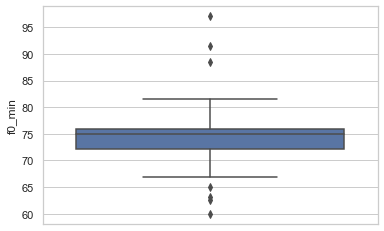

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

def print_boxplot(email,variable):
    var = round(feats.loc[email,variable],3)

    sns.set_theme(style="whitegrid")
    ax = sns.boxplot(y=variable, data=feats)
    ax.axhline(var,c='r')

    plt.text(-0.3, var*1.005, var, horizontalalignment='left', size='small', color='red', weight='normal')

widgets.interactive(print_boxplot,email=email,variable=variable)

# Scores and features processing

In [9]:
parole = ['Q1','Q2','Q4']
texte = ['Q5','Q6']
visuel = ['Q3','Q7','Q8','Q21']
discours = ['Q9','Q10','Q11','Q13','Q17']
motivation = ['Q14','Q15']
impression = ['Q12','Q16','Q18','Q19','Q20']

In [10]:
from models_utils import get_scores, merge_scores_feats

def get_scores(df_name):
    scores = [pd.read_excel(df_name,i) for i in range(4)]
    #scores = [normalize(s) for s in scores]
    scores_all = pd.concat(scores)

    scores_all = scores_all.groupby(level=-1).mean()
    scores_all['email'] = scores[0]['email']
    return scores_all
    
scores = get_scores(df_name)

feats = get_features(audios)

feats, scores = merge_scores_feats(scores,feats)


<AxesSubplot:>

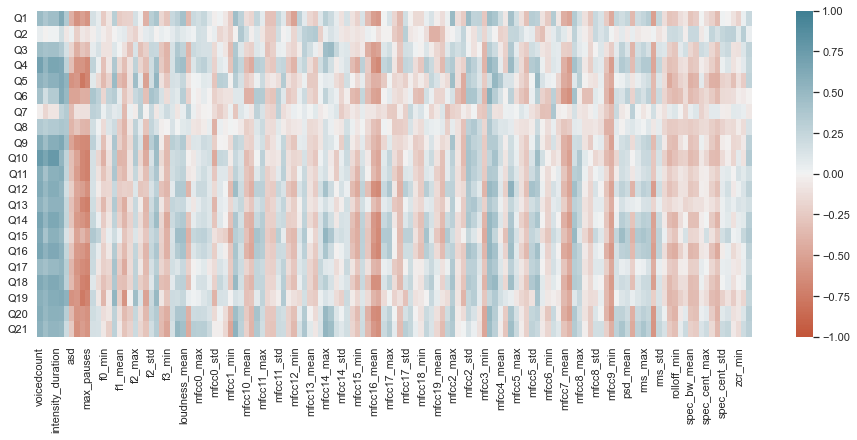

In [ ]:
import seaborn as sns
cormat = pd.concat([feats, scores], axis=1).corr()

cormat = cormat.loc[scores.columns,feats.columns]

plt.figure(figsize=(16, 6))
sns.heatmap(cormat, vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, n=200))

In [ ]:
cormat[abs(cormat)>0.6].dropna(axis=0,how='all').dropna(axis=1,how='all')

,voicedcount,npause,originaldur,intensity_duration,speakingrate,asd,nb_pauses,mean_pauses,max_pauses,mfcc16_mean,mfcc16_min,mfcc7_min
Q1,NaN,NaN,NaN,NaN,0.620136,NaN,-0.600083,NaN,NaN,NaN,NaN,NaN
Q4,0.693874,NaN,0.654402,0.654402,0.637727,NaN,NaN,NaN,-0.668620,NaN,-0.664415,NaN
Q5,NaN,NaN,NaN,NaN,0.630570,-0.605182,NaN,-0.771430,-0.678768,NaN,NaN,NaN
Q6,NaN,NaN,NaN,NaN,0.615179,NaN,NaN,NaN,NaN,NaN,NaN,-0.613974
Q9,0.605375,NaN,NaN,NaN,0.649400,NaN,-0.620515,-0.655218,-0.667290,NaN,NaN,NaN
Q10,0.751751,0.650093,0.760056,0.760056,NaN,NaN,NaN,-0.677212,-0.711859,NaN,NaN,NaN
Q11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.671774,-0.711704,NaN,NaN,NaN
Q12,0.617159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.615788,-0.610445,-0.661068,NaN
Q13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.685031,-0.723451,NaN,NaN,NaN
Q14,0.679739,NaN,0.649856,0.649856,NaN,NaN,NaN,NaN,-0.653803,NaN,-0.649074,NaN


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, f1_score

X_train, X_test, y_train, y_test = train_test_split(feats,scores,
                                                    test_size=0.1, random_state=42)

mse = []
model = RandomForestRegressor()
for i in range(21):
    y_tr = y_train['Q'+str(i+1)]
    y_te = y_test['Q'+str(i+1)]

    model.fit(X_train,y_tr)
    mse.append(mean_squared_error(model.predict(X_test),y_te))

In [ ]:
parole = ['Q1','Q2','Q4']
texte = ['Q5','Q6']
visuel = ['Q3','Q7','Q8','Q21']
discours = ['Q9','Q10','Q11','Q13','Q17']
motivation = ['Q14','Q15']
impression = ['Q12','Q16','Q18','Q19','Q20']

colors = ['r','g','y','pink','orange']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


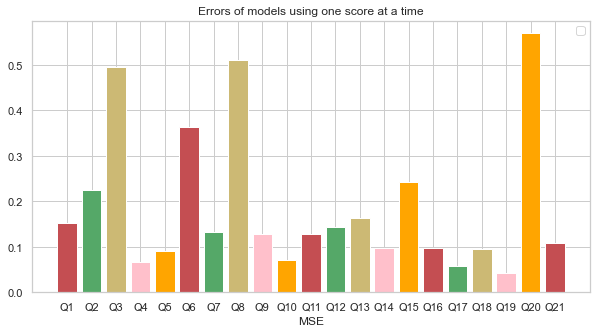

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(['Q'+str(i+1) for i in range(21)],mse, color=colors)
plt.title('Errors of models using one score at a time')
plt.xlabel('Question')
plt.xlabel('MSE')

# One label classification/regression

In [ ]:
import numpy as np
score = scores.mean(axis=1)

X_train, X_test, y_train, y_test = train_test_split(feats,score,test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(X_train,y_train)

metric = mean_squared_error

print('train mse:',metric(model.predict(X_train),y_train))
print('test mse: ',metric(model.predict(X_test),y_test))

metric =  f1_score

print('train f1_score:',metric(model.predict(X_train).round(),y_train.round(),average='weighted'))
print('test f1_score: ',metric(model.predict(X_test).round(),y_test.round(),average='weighted'))

train mse: 0.011389655694008287
test mse:  0.06340023384353764
train f1_score: 0.9238761238761237
test f1_score:  0.8674948240165632


In [ ]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(feats,score.round(),test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=1000,max_depth=10)
model.fit(X_train,y_train)

metric =  f1_score

print('train f1_score:',metric(model.predict(X_train),y_train,average='weighted'))
print('test f1_score: ',metric(model.predict(X_test),y_test,average='weighted'))

train f1_score: 1.0
test f1_score:  0.9627329192546584


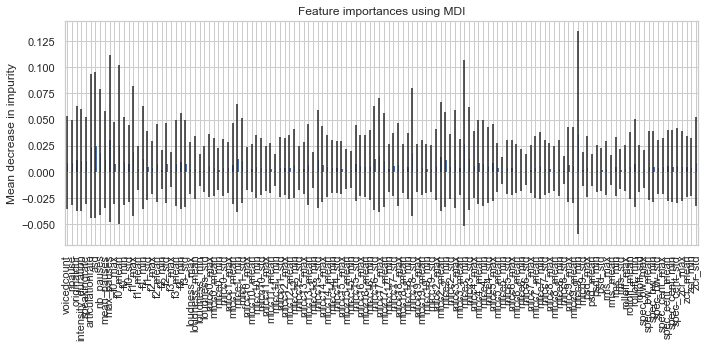

In [ ]:
importances = model.feature_importances_
forest_importances = pd.Series(importances, index=feats.columns)
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)

fig, ax = plt.subplots(figsize=(10,5))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
forest_importances.sort_values(ascending=False).head(15)

mfcc9_min           0.037547
max_pauses          0.031970
mfcc3_min           0.027595
f0_mean             0.026563
asd                 0.026202
articulationrate    0.025047
f1_max              0.020271
nb_pauses           0.019120
mfcc18_std          0.019109
mfcc17_max          0.016298
mfcc2_mean          0.015171
f1_min              0.013782
mfcc16_std          0.013459
mfcc1_min           0.013391
mfcc3_std           0.012960
dtype: float64

# Multilabel classification/regression

In [ ]:
import numpy as np

score = scores.copy()
score['parole'] = score[parole].mean(axis=1)
score['texte'] = score[texte].mean(axis=1)
score['visuel'] = score[visuel].mean(axis=1)
score['discours'] = score[discours].mean(axis=1)
score['motivation'] = score[motivation].mean(axis=1)
score['impression'] = score[impression].mean(axis=1)
score['all'] = score.mean(axis=1)

score = score[['parole','texte','visuel','discours','motivation','impression','all']]


X_train, X_test, y_train, y_test = train_test_split(feats,score,test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=50,max_depth=50)
model.fit(X_train,y_train)

metric = mean_squared_error

print('train mse:',metric(model.predict(X_train),y_train))
print('test mse: ',metric(model.predict(X_test),y_test))

train mse: 0.02399513687231072
test mse:  0.11493993899003929


In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.multioutput import MultiOutputClassifier

score = scores.copy()
score['parole'] = score[parole].mean(axis=1)
score['texte'] = score[texte].mean(axis=1)
score['visuel'] = score[visuel].mean(axis=1)
score['discours'] = score[discours].mean(axis=1)
score['motivation'] = score[motivation].mean(axis=1)
score['impression'] = score[impression].mean(axis=1)
score['all'] = score.mean(axis=1)

score = score[['parole','texte','visuel','discours','motivation','impression','all']]

X_train, X_test, y_train, y_test = train_test_split(feats,score.round(),test_size=0.2, random_state=42)

model = MultiOutputClassifier(RandomForestClassifier(n_estimators=50,max_depth=50))
model.fit(X_train,y_train)

metric =  f1_score

predictions = np.stack(model.predict(X_train))
print([metric(np.array(y_train)[:,i],predictions[:,i],average='weighted') for i in range(7)])
#roc_auc_score(np.stack(predictions),np.stack(y_train))

predictions = np.stack(model.predict(X_test))
print([metric(np.array(y_test)[:,i],predictions[:,i],average='weighted') for i in range(7)])

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.7547619047619047, 0.4738095238095238, 0.6775510204081633, 0.7857142857142857, 0.7619047619047619, 0.9285714285714286, 0.8944099378881988]


# Explainabiliyy

In [ ]:
# this is required as LIME requires class probabilities in case of classification example

def prob(data):
    return np.array(list(zip(1-model.predict(data),model.predict(data))))
    

explainer = lime.lime_tabular.LimeTabularExplainer(df_titanic[model.feature_name()].astype(int).values,  
mode='classification',training_labels=df_titanic['Survived'],feature_names=model.feature_name())


# asking for explanation for LIME model
i = 1
exp = explainer.explain_instance(df_titanic.loc[i,feat].astype(int).values, prob, num_features=5)


# PCA

[pca] >Processing dataframe..
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed on the [134] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[50]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]
       PC        feature   loading  type
0     PC1   spec_bw_mean  0.172735  best
1     PC2        zcr_std  0.163642  best
2     PC3         f2_std -0.225916  best
3     PC4    spec_bw_std -0.201489  best
4     PC5      mfcc5_std  0.207843  best
..    ...            ...       ...   ...
140  PC41  spec_cent_min -0.174046  weak
141   PC4  spec_cent_std -0.150484  weak
142  PC13        zcr_max -0.164864  weak
143   PC1       zcr_mean  0.136199  weak
144  PC17        zcr_min -0.217332  weak

[145 rows x 4 columns]
[pca] >Plot PC1 vs PC2 with loadings.


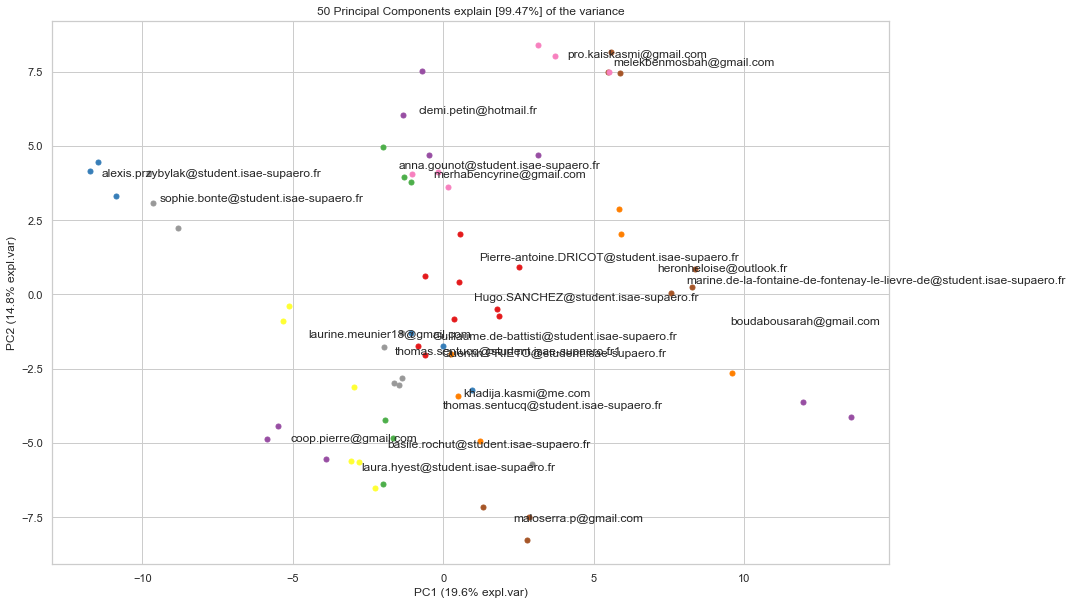

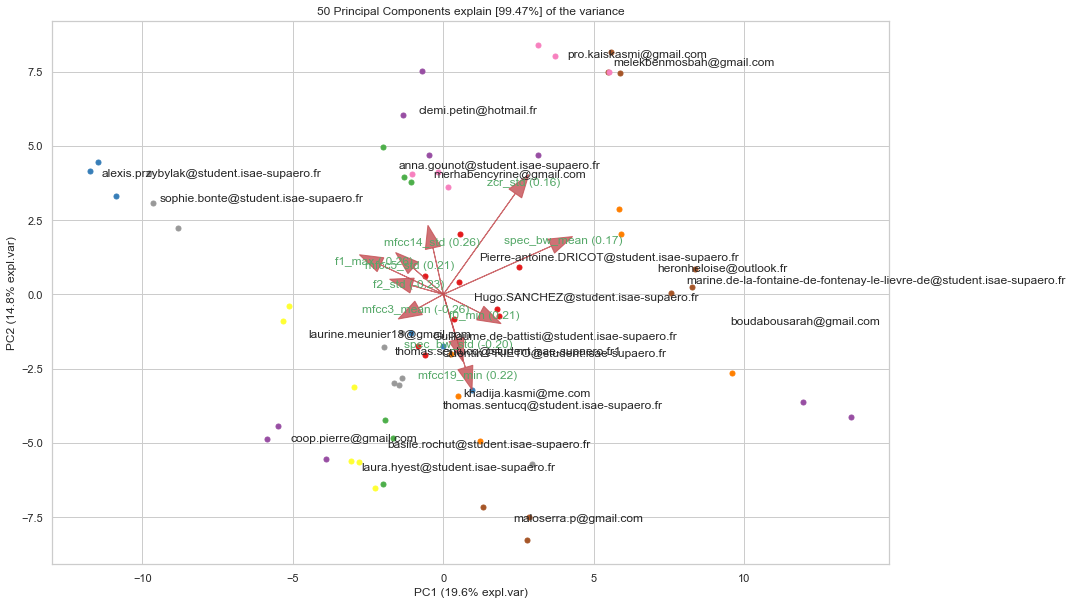

C:\Users\Kinza\AppData\Local\Temp\ipykernel_8632\3222996560.py:19: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


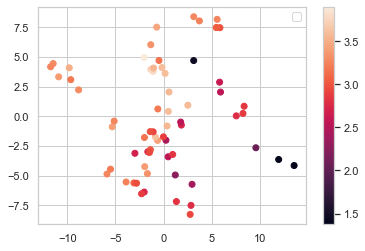

In [ ]:
from pca import pca

pca_m = pca(n_components=50,normalize=True)

# Fit transform
features_pca = pca_m.fit_transform(feats)

print(pca_m.compute_topfeat())

# Scatter first 2 PCs
fig, ax = pca_m.scatter(legend=False)

# Make biplot with the number of features
fig, ax = pca_m.biplot(n_feat=10,legend=False)

import matplotlib.pyplot as plt
new_score = (score-score.min())/(score.max()-score.min())*3
plt.scatter(features_pca['PC']['PC1'],features_pca['PC']['PC2'],c=score['all'])
plt.colorbar()
plt.legend()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features_pca['PC'],
                                                    score,
                                                    test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(X_train,y_train)

metric = mean_squared_error

print('train mse:',metric(model.predict(X_train),y_train))
print('test mse: ',metric(model.predict(X_test),y_test))

metric =  f1_score

print('train f1_score:',metric(model.predict(X_train).round(),y_train.round(),average='weighted'))
print('test f1_score: ',metric(model.predict(X_test).round(),y_test.round(),average='weighted'))

train mse: 0.029868391739708563
test mse:  0.2555148313492065
train f1_score: 0.8411407869239194
test f1_score:  0.88


In [ ]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(features_pca['PC'],
                                                    score.round(),
                                                    test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=1000,max_depth=10)
model.fit(X_train,y_train)

metric =  f1_score

print('train f1_score:',metric(model.predict(X_train),y_train,average='weighted'))
print('test f1_score: ',metric(model.predict(X_test),y_test,average='weighted'))

train f1_score: 1.0
test f1_score:  0.88
